In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
%matplotlib inline

In [3]:
df = pd.read_csv('AdviseInvestData.csv')

In [4]:
df

,OBS.,ANSWERED,INCOME,FEMALE,AGE,JOB,NUM_DEPENDENTS,RENT,OWN_RES,NEW_CAR,CHK_ACCT,SAV_ACCT,NUM_ACCTS,MOBILE,PRODUCT
0,133,1,13520,0,23,0,1,1,0,0,0,2,0,1,2
1,1509,0,14780,0,22,2,1,0,1,0,3,0,3,0,0
2,1530,1,37570,0,62,2,1,0,0,1,3,0,4,0,4
3,1886,0,12450,0,33,2,1,0,1,0,1,0,2,0,0
4,2463,0,12400,0,48,1,2,0,0,1,2,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29499,9998377,1,11630,0,44,2,1,0,1,1,3,2,2,0,4
29500,9998970,0,28640,0,34,1,2,0,1,0,2,0,2,0,0
29501,9999108,1,34480,0,74,1,1,0,1,0,3,0,3,0,4
29502,9999701,1,10550,0,30,2,1,0,1,1,3,0,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   OBS.            29504 non-null  int64
 1   ANSWERED        29504 non-null  int64
 2   INCOME          29504 non-null  int64
 3   FEMALE          29504 non-null  int64
 4   AGE             29504 non-null  int64
 5   JOB             29504 non-null  int64
 6   NUM_DEPENDENTS  29504 non-null  int64
 7   RENT            29504 non-null  int64
 8   OWN_RES         29504 non-null  int64
 9   NEW_CAR         29504 non-null  int64
 10  CHK_ACCT        29504 non-null  int64
 11  SAV_ACCT        29504 non-null  int64
 12  NUM_ACCTS       29504 non-null  int64
 13  MOBILE          29504 non-null  int64
 14  PRODUCT         29504 non-null  int64
dtypes: int64(15)
memory usage: 3.4 MB


# Descriptive analytics

Groupping 3 types of customer: who didn't answer phone, who answered but didn't buy the product, who answered and buy product

In [6]:
def product_group(x):
    if x == 0:
        return 'not answer'
    elif x==1:
        return 'answered but not purchase'
    else:
        return 'answered and purchased'

In [7]:
df['purchased'] = df['PRODUCT'].apply(lambda x: product_group(x))

In [8]:
df

,OBS.,ANSWERED,INCOME,FEMALE,AGE,JOB,NUM_DEPENDENTS,RENT,OWN_RES,NEW_CAR,CHK_ACCT,SAV_ACCT,NUM_ACCTS,MOBILE,PRODUCT,purchased
0,133,1,13520,0,23,0,1,1,0,0,0,2,0,1,2,answered and purchased
1,1509,0,14780,0,22,2,1,0,1,0,3,0,3,0,0,not answer
2,1530,1,37570,0,62,2,1,0,0,1,3,0,4,0,4,answered and purchased
3,1886,0,12450,0,33,2,1,0,1,0,1,0,2,0,0,not answer
4,2463,0,12400,0,48,1,2,0,0,1,2,1,4,0,0,not answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29499,9998377,1,11630,0,44,2,1,0,1,1,3,2,2,0,4,answered and purchased
29500,9998970,0,28640,0,34,1,2,0,1,0,2,0,2,0,0,not answer
29501,9999108,1,34480,0,74,1,1,0,1,0,3,0,3,0,4,answered and purchased
29502,9999701,1,10550,0,30,2,1,0,1,1,3,0,1,0,1,answered but not purchase


Text(0.5, 0, ' ')

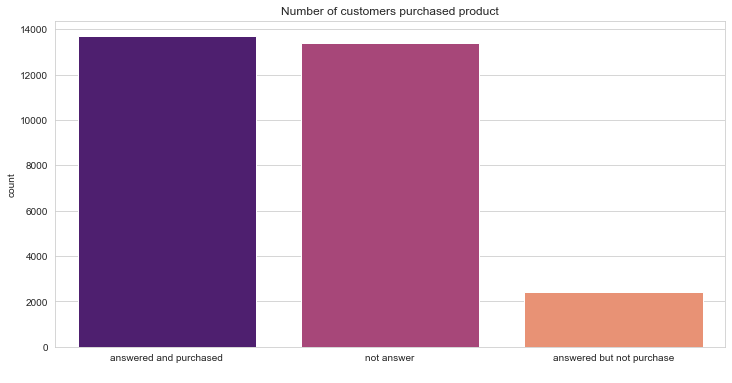

In [9]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(df['purchased'],palette='magma' )
plt.title('Number of customers purchased product')
plt.xlabel(' ')

In [10]:
df.groupby('purchased').count()['OBS.']/df['OBS.'].count()*100

purchased
answered and purchased       46.420824
answered but not purchase     8.242950
not answer                   45.336226
Name: OBS., dtype: float64

- Income, age and product

<Figure size 1296x648 with 0 Axes>

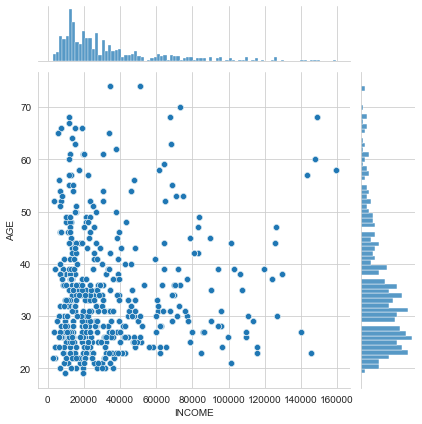

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
sns.jointplot(x='INCOME', y='AGE', data=df,palette = "viridis")

In [12]:
df['INCOME'].describe()

count     29504.000000
mean      33772.386117
std       29372.888155
min        2760.000000
25%       13550.000000
50%       23310.000000
75%       41690.000000
max      159450.000000
Name: INCOME, dtype: float64

In [13]:
df['AGE'].describe()

count    29504.000000
mean        34.770065
std         11.355777
min         19.000000
25%         26.000000
50%         32.000000
75%         40.000000
max         74.000000
Name: AGE, dtype: float64

- Gender

In [14]:
df.groupby('FEMALE').count()['OBS.']/df['OBS.'].count()

FEMALE
0    0.94577
1    0.05423
Name: OBS., dtype: float64

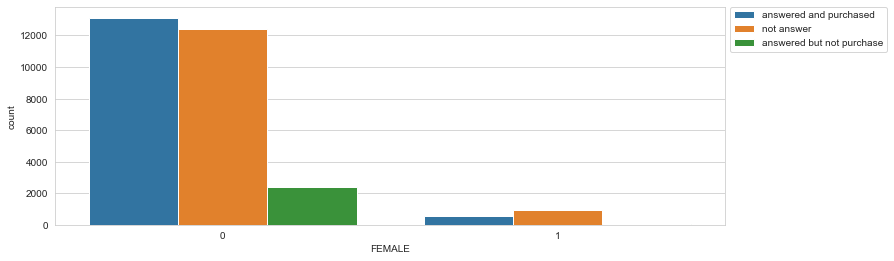

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.countplot(df['FEMALE'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

- Job type

In [16]:
df.groupby('JOB').count()['OBS.']/df['OBS.'].count()

JOB
0    0.026030
1    0.184382
2    0.637744
3    0.151844
Name: OBS., dtype: float64

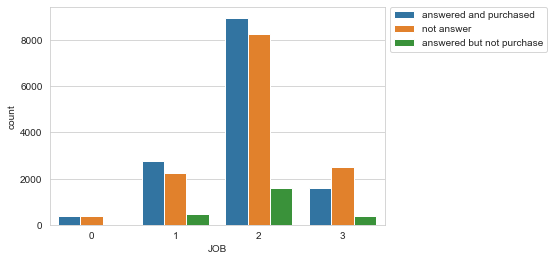

In [17]:
sns.countplot(df['JOB'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

- Number of dependents

In [18]:
df.groupby('NUM_DEPENDENTS').count()['OBS.']/df['OBS.'].count()

NUM_DEPENDENTS
1    0.859002
2    0.140998
Name: OBS., dtype: float64

- Rent and own_residence

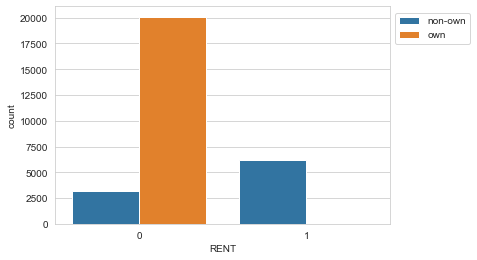

In [19]:
sns.set_style('whitegrid')
sns.countplot(df['RENT'], hue='OWN_RES', data=df)
plt.legend(labels = ['non-own','own'],loc='center left', bbox_to_anchor=(1, 0.9))

- New_car and product

In [20]:
df.groupby('NEW_CAR').count()['OBS.']/df['OBS.'].count()

NEW_CAR
0    0.759219
1    0.240781
Name: OBS., dtype: float64

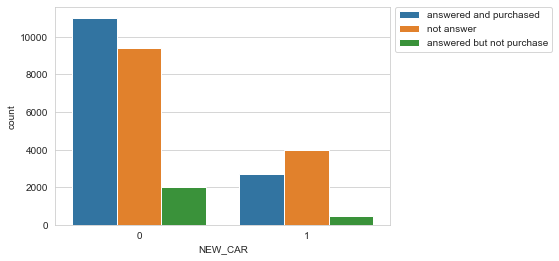

In [21]:
sns.countplot(df['NEW_CAR'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [22]:
# The percentage
new_car = pd.DataFrame(df.groupby(['purchased','NEW_CAR']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                                      columns = 'NEW_CAR')
new_car['%no'] = new_car[0]/new_car[0].sum()*100
new_car['%yes'] = new_car[1]/new_car[1].sum()*100
new_car

NEW_CAR,0,1,%no,%yes
purchased,,,,
answered and purchased,11008,2688,49.142857,37.837838
answered but not purchase,1984,448,8.857143,6.306306
not answer,9408,3968,42.000000,55.855856


- Checking and saving account

In [23]:
df.groupby('CHK_ACCT').count()['OBS.']/df['OBS.'].count()

CHK_ACCT
0    0.288503
1    0.303688
2    0.058568
3    0.349241
Name: OBS., dtype: float64

In [24]:
df.groupby('SAV_ACCT').count()['OBS.']/df['OBS.'].count()

SAV_ACCT
0    0.637744
1    0.108460
2    0.058568
3    0.049892
4    0.145336
Name: OBS., dtype: float64

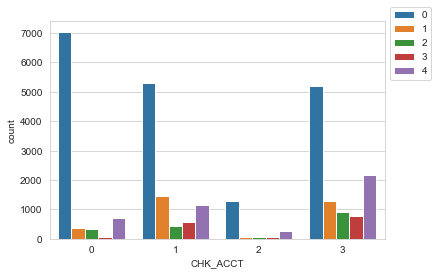

In [25]:
sns.countplot(df['CHK_ACCT'], hue='SAV_ACCT', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

- Number account

In [26]:
df.groupby('NUM_ACCTS').count()['OBS.']/df['OBS.'].count()

NUM_ACCTS
0    0.065076
1    0.175705
2    0.344902
3    0.177874
4    0.236443
Name: OBS., dtype: float64

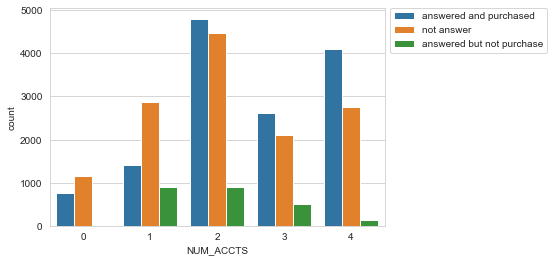

In [27]:
sns.countplot(df['NUM_ACCTS'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [28]:
# The percentage
num_acc = pd.DataFrame(df.groupby(['purchased','NUM_ACCTS']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                                          columns = 'NUM_ACCTS')
num_acc['%no'] = num_acc[0]/num_acc[0].sum()*100
num_acc['%1'] = num_acc[1]/num_acc[1].sum()*100
num_acc['%2'] =num_acc[2]/num_acc[2].sum()*100
num_acc['%3'] = num_acc[3]/num_acc[3].sum()*100
num_acc['%4'] = num_acc[4]/num_acc[4].sum()*100
num_acc

NUM_ACCTS,0,1,2,3,4,%no,%1,%2,%3,%4
purchased,,,,,,,,,,
answered and purchased,768.0,1408.0,4800.0,2624.0,4096.0,40.0,27.160494,47.169811,50.000000,58.715596
answered but not purchase,NaN,896.0,896.0,512.0,128.0,NaN,17.283951,8.805031,9.756098,1.834862
not answer,1152.0,2880.0,4480.0,2112.0,2752.0,60.0,55.555556,44.025157,40.243902,39.449541


- Mobile

In [29]:
df.groupby('MOBILE').count()['OBS.']/df['OBS.'].count()

MOBILE
0    0.908894
1    0.091106
Name: OBS., dtype: float64

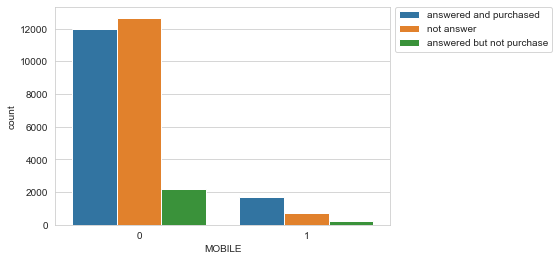

In [30]:
sns.countplot(df['MOBILE'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

# Diagnostic analysis

- Income and product

Text(0.5, 0, ' ')

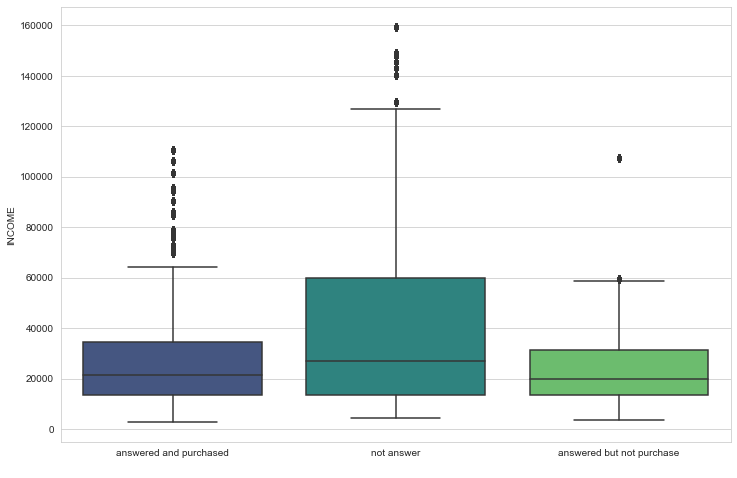

In [31]:
# Boxplot of income
plt.figure(figsize=(12,8))
sns.boxplot(x='purchased', y='INCOME', data=df,  palette='viridis')
plt.xlabel(' ')

- Age and product

Text(0.5, 0, ' ')

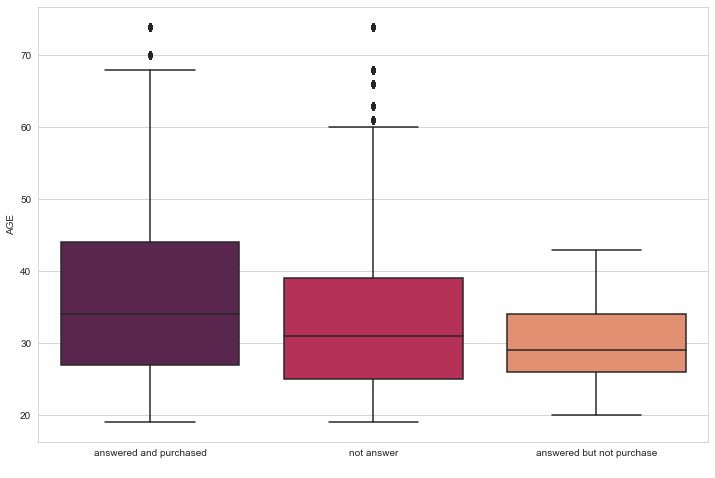

In [32]:
# boxplot of age
plt.figure(figsize=(12,8))
sns.boxplot(x='purchased', y='AGE', data=df,  palette='rocket')
plt.xlabel(' ')

- Income, age and gender 

<Figure size 1296x432 with 0 Axes>

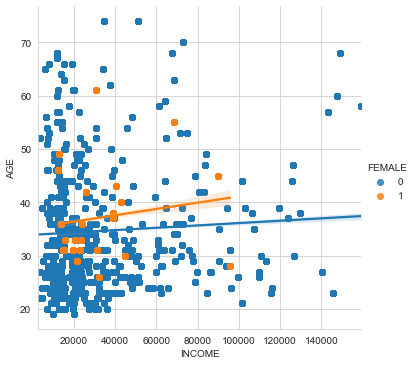

In [33]:
plt.figure(figsize=(18,6))
sns.lmplot(x='INCOME', y='AGE',data=df, hue='FEMALE' )

In [34]:
# the percentage of female
female_purchase = pd.DataFrame(df.groupby(['purchased','FEMALE']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                         columns = 'FEMALE')
female_purchase['percentage'] = female_purchase[0]/female_purchase[0].sum()*100
female_purchase

FEMALE,0,1,percentage
purchased,,,
answered and purchased,13120,576,47.018349
answered but not purchase,2368,64,8.486239
not answer,12416,960,44.495413


In [35]:
# the percentage of male
male_purchase = pd.DataFrame(df.groupby(['purchased','FEMALE']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                         columns = 'FEMALE')
male_purchase['percentage'] = male_purchase[1]/female_purchase[1].sum()*100
male_purchase

FEMALE,0,1,percentage
purchased,,,
answered and purchased,13120,576,36.0
answered but not purchase,2368,64,4.0
not answer,12416,960,60.0


In [36]:
df.groupby('FEMALE')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
FEMALE,,,,,,,,
0,27904.0,34.635321,11.482044,19.0,26.0,32.0,40.0,74.0
1,1600.0,37.120000,8.536460,26.0,31.0,33.0,42.0,61.0


In [37]:
df.groupby('FEMALE')['INCOME'].describe()

,count,mean,std,min,25%,50%,75%,max
FEMALE,,,,,,,,
0,27904.0,33831.353211,29747.460652,2760.0,13422.5,23245.0,42197.5,159450.0
1,1600.0,32744.000000,21811.768057,12230.0,19350.0,23660.0,39140.0,95720.0


- Job type

In [38]:
# The percentage of job
job = pd.DataFrame(df.groupby(['purchased','JOB']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                         columns = 'JOB')
job['%unemployed'] = job[0]/job[0].sum()*100
job['%entry'] = job[1]/job[1].sum()*100
job['%midle'] = job[2]/job[2].sum()*100
job['%management'] = job[2]/job[2].sum()*100
job

JOB,0,1,2,3,%unemployed,%entry,%midle,%management
purchased,,,,,,,,
answered and purchased,384.0,2752.0,8960.0,1600.0,50.0,50.588235,47.619048,47.619048
answered but not purchase,NaN,448.0,1600.0,384.0,NaN,8.235294,8.503401,8.503401
not answer,384.0,2240.0,8256.0,2496.0,50.0,41.176471,43.877551,43.877551


- Number of dependents

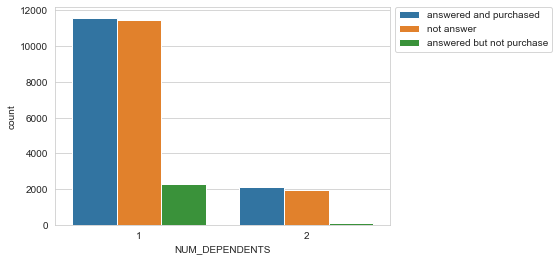

In [39]:
sns.countplot(df['NUM_DEPENDENTS'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [40]:
# The percentage
dependent = pd.DataFrame(df.groupby(['purchased','NUM_DEPENDENTS']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                         columns = 'NUM_DEPENDENTS')
dependent['1percentage'] = dependent[1]/dependent[1].sum()*100
dependent['2percentage'] = dependent[2]/dependent[2].sum()*100
dependent

NUM_DEPENDENTS,1,2,1percentage,2percentage
purchased,,,,
answered and purchased,11584,2112,45.707071,50.769231
answered but not purchase,2304,128,9.090909,3.076923
not answer,11456,1920,45.202020,46.153846


- Rent or own_residence

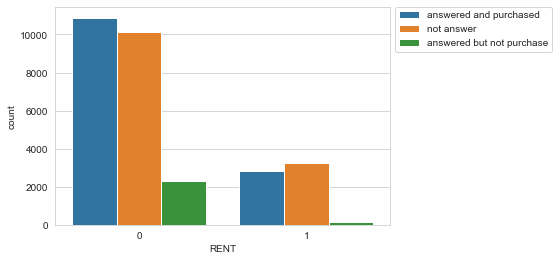

In [41]:
sns.countplot(df['RENT'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [42]:
# The percentage
rent = pd.DataFrame(df.groupby(['purchased','OWN_RES']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
columns = 'OWN_RES')
rent['%no_residence'] = rent[0]/rent[0].sum()*100
rent['%residence'] = rent[1]/rent[1].sum()*100
rent

OWN_RES,0,1,%no_residence,%residence
purchased,,,,
answered and purchased,4096,9600,43.537415,47.770701
answered but not purchase,256,2176,2.721088,10.828025
not answer,5056,8320,53.741497,41.401274


- Checking account/saving account

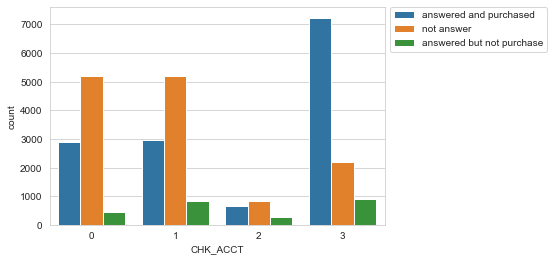

In [43]:
sns.countplot(df['CHK_ACCT'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [44]:
    # The percentage
    chk_acc = pd.DataFrame(df.groupby(['purchased','CHK_ACCT']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                                          columns = 'CHK_ACCT')
    chk_acc['%no'] = chk_acc[0]/chk_acc[0].sum()*100
    chk_acc['%1'] = chk_acc[1]/chk_acc[1].sum()*100
    chk_acc['%2'] =chk_acc[2]/chk_acc[2].sum()*100
    chk_acc['%3'] = chk_acc[3]/chk_acc[3].sum()*100
    chk_acc

CHK_ACCT,0,1,2,3,%no,%1,%2,%3
purchased,,,,,,,,
answered and purchased,2880,2944,640,7232,33.834586,32.857143,37.037037,70.186335
answered but not purchase,448,832,256,896,5.263158,9.285714,14.814815,8.695652
not answer,5184,5184,832,2176,60.902256,57.857143,48.148148,21.118012


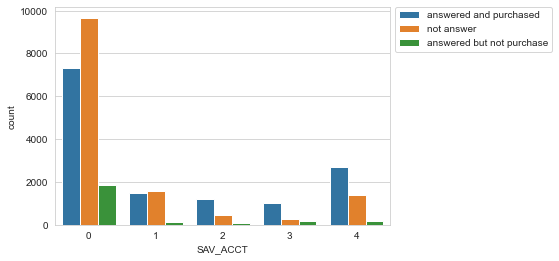

In [45]:
sns.countplot(df['SAV_ACCT'], hue='purchased', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [46]:
# The percentage
sav_acc = pd.DataFrame(df.groupby(['purchased','SAV_ACCT']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                                          columns = 'SAV_ACCT')
sav_acc['%no'] = sav_acc[0]/sav_acc[0].sum()*100
sav_acc['%1'] = sav_acc[1]/sav_acc[1].sum()*100
sav_acc['%2'] =sav_acc[2]/sav_acc[2].sum()*100
sav_acc['%3'] = sav_acc[3]/sav_acc[3].sum()*100
sav_acc['%4'] = sav_acc[4]/sav_acc[4].sum()*100
sav_acc

SAV_ACCT,0,1,2,3,4,%no,%1,%2,%3,%4
purchased,,,,,,,,,,
answered and purchased,7296,1472,1216,1024,2688,38.775510,46.0,70.370370,69.565217,62.686567
answered but not purchase,1856,128,64,192,192,9.863946,4.0,3.703704,13.043478,4.477612
not answer,9664,1600,448,256,1408,51.360544,50.0,25.925926,17.391304,32.835821


- Mobile

In [47]:
# The percentage
mobile = pd.DataFrame(df.groupby(['purchased','MOBILE']).count()['OBS.']).reset_index().pivot_table(values='OBS.', index='purchased',
                                                                                                          columns = 'MOBILE')
mobile['%no'] = mobile[0]/mobile[0].sum()*100
mobile['%1'] = mobile[1]/mobile[1].sum()*100
mobile

MOBILE,0,1,%no,%1
purchased,,,,
answered and purchased,11968,1728,44.630072,64.285714
answered but not purchase,2176,256,8.114558,9.523810
not answer,12672,704,47.255370,26.190476


- Creating randomly 700 

In [57]:
random = pd.DataFrame(np.random.randint(10,15,540))

In [58]:
random.to_excel('ramdom2.xlsx')